In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('./house_data_final.csv')
df

,Price,Area,No. of Bedrooms,New/Resale,Lift Available,Location_Airoli,Location_Ambernath East,Location_Ambernath West,Location_Andheri,Location_Andheri East,...,Location_Vashi,Location_Ville Parle East,Location_Virar,Location_Virar East,Location_Virar West,Location_Wadala,Location_Wadala East Wadala,Location_Worli,Location_matunga east,Location_mumbai
0,48.5,720,1,0,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,45.0,600,1,0,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,67.0,650,1,0,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,45.0,650,1,0,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,50.0,665,1,0,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4663,72.0,995,2,1,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4664,70.0,1020,2,1,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4665,145.0,900,2,0,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4666,145.0,900,2,0,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [3]:
from sklearn.linear_model import ElasticNet,Lasso,LinearRegression,Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,cross_validate,GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

In [4]:
X = df.drop('Price' , axis=1)
y = df['Price']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [6]:
standard = StandardScaler()
standard.fit(X_train)
scaled_X_train = standard.transform(X_train)
scaled_X_test = standard.transform(X_test)

In [7]:
lr = LinearRegression()
lr.fit(scaled_X_train,y_train)

LinearRegression()

In [8]:
pred = lr.predict(scaled_X_test)
rmse = np.sqrt(mean_squared_error(y_test,pred))
rmse

24.680825378556044

In [9]:
svr = SVR()

In [10]:
param_grid = {'kernel':['linear'] , 'C':[0.01,0.1,1] , 'epsilon':[0,0.01,0.1,1]}

In [11]:
grid = GridSearchCV(svr,param_grid)

In [12]:
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.01, 0.1, 1], 'epsilon': [0, 0.01, 0.1, 1],
                         'kernel': ['linear']})

In [13]:
pred = grid.predict(scaled_X_test)
rmse = np.sqrt(mean_squared_error(y_test,pred))
rmse

26.092969263790543

In [14]:
grid.best_params_

{'C': 1, 'epsilon': 1, 'kernel': 'linear'}

In [15]:
model = RandomForestRegressor()

In [16]:
param_grid = {'n_estimators':[5,50,64,100] , "max_features": [2,3,4]}

In [17]:
grid  = GridSearchCV(model,param_grid)

In [18]:
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 3, 4],
                         'n_estimators': [5, 50, 64, 100]})

In [19]:
pred = grid.predict(scaled_X_test)
rmse = np.sqrt(mean_squared_error(y_test,pred))
rmse

23.243778622501928

In [31]:
mean_absolute_error(y_test,pred)

14.832253990049406

In [20]:
grid.best_params_

{'max_features': 3, 'n_estimators': 100}

<mark>Based on result Random Forest is a good choice</mark>

<h3><mark>testing the model</mark></h3>

In [32]:
model = RandomForestRegressor(max_features=3 , n_estimators=100)
model.fit(scaled_X_train, y_train)

RandomForestRegressor(max_features=3)

In [33]:
y_predict = model.predict(scaled_X_test)

In [34]:
residual = y_test-y_predict

<h3><mark>residual plotting</mark></h3>

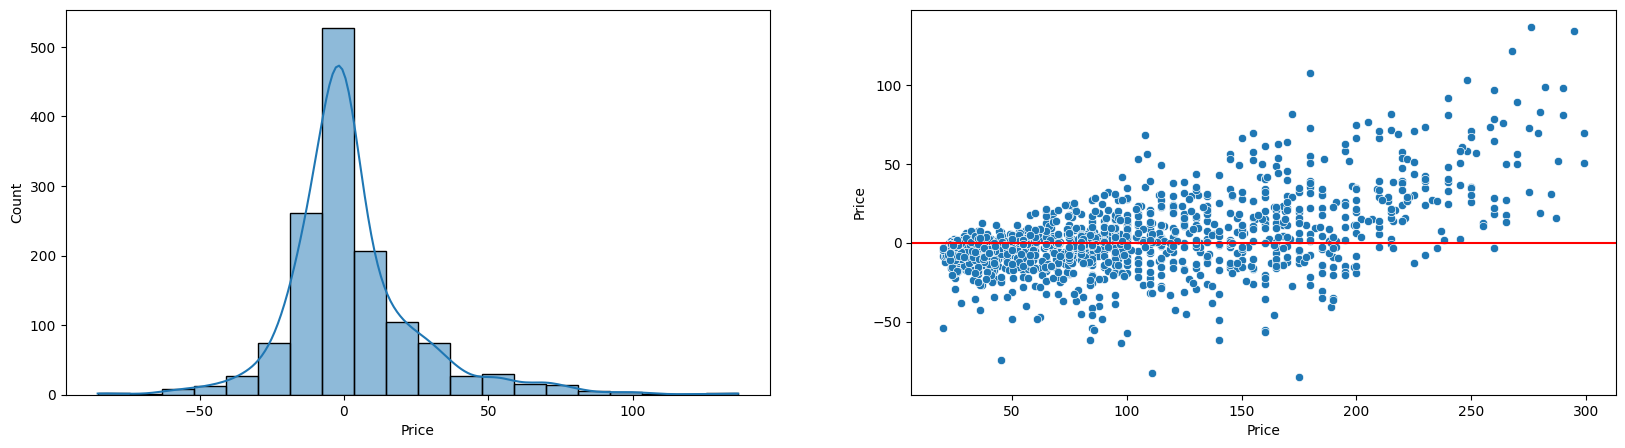

In [35]:
fig, axes = plt.subplots(1, 2 , figsize=(20,5))
sns.histplot(residual , kde=True , ax=axes[0] , bins=20)
sns.scatterplot(x=y_test , y=residual , ax=axes[1])
axes[1].axhline(y=0, color='r')

Final Model Train

In [37]:
scaled_X = standard.fit_transform(X)

In [38]:
model = RandomForestRegressor(max_features=3 , n_estimators=100)
model.fit(scaled_X, y)

RandomForestRegressor(max_features=3)

In [47]:
import numpy as np

def predict_price(Area, Bedrooms,New, Lift, location):
    # Create an array of zeros with the length equal to the number of features
    x = np.zeros(len(X.columns))
    
    # Assign the raw Area, Bedrooms, and Lift to the corresponding positions in the array
    x[0] = Area
    x[1] = Bedrooms
    x[2] = New
    x[3] = Lift
    
    # Find the index of the location and set it to 1 if found
    if location in X.columns:
        loc_index = np.where(X.columns == location)[0][0]
        x[loc_index] = 1
    
    # Transform the feature vector using the fitted scaler
    x = standard.transform([x])
    
    # Return the predicted price
    return model.predict(x)[0]



<h3><mark>Final test</mark></h3>

In [48]:
X.columns

Index(['Area', 'No. of Bedrooms', 'New/Resale', 'Lift Available',
       'Location_Airoli', 'Location_Ambernath East', 'Location_Ambernath West',
       'Location_Andheri', 'Location_Andheri East', 'Location_Andheri West',
       'Location_Badlapur East', 'Location_Bandra East',
       'Location_Bandra West', 'Location_Belapur', 'Location_Bhandup West',
       'Location_Bhayandar East', 'Location_Bhiwandi', 'Location_Boisar',
       'Location_Borivali East', 'Location_Borivali West', 'Location_Chembur',
       'Location_Chembur East', 'Location_Dahisar', 'Location_Dahisar East',
       'Location_Dahisar West', 'Location_Dattapada', 'Location_Dombivali',
       'Location_Dombivali East', 'Location_Dombivli (West)',
       'Location_Dronagiri', 'Location_Ghansoli', 'Location_Ghatkopar',
       'Location_Ghatkopar West', 'Location_Goregaon',
       'Location_Goregaon East', 'Location_Goregaon West',
       'Location_Jogeshwari West', 'Location_Juhu', 'Location_Kalwa',
       'Location_Kal

In [64]:
predict_price(Area=600, Bedrooms=2, New=1, Lift=0, location='Location_Ghatkopar')

C:\Users\SAMI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


115.8937993

<mark>Reasobaly accurate result compared to pricing on housing sites</mark>